In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgl
import utils

## 1.3.1 Influence of the Parameter N
### Q1) 
We consider a sinusoid of amplitude 1 and frequency equal to 600 Hz, sampled
at 10 kHz and limited to N = 200 samples. Visualize its temporal pace and 
display its full spectrum (ie corresponding to φ ranging from 0 to 2π) on NTFD =
2048 samples. Explain the position of the lines, their pace and the value of their
amplitudes.

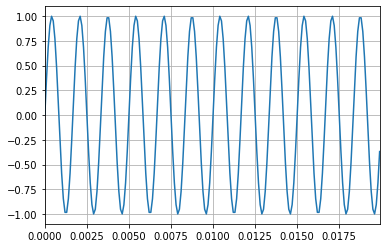

In [2]:
x, s = utils.get_sinusoid(1, 600, 10000, 200)
plt.plot(x, s)
plt.margins(x=0)
plt.grid()

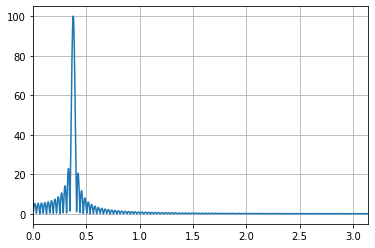

In [3]:
h, w = sgl.freqz(s, [1], worN=2048)
plt.plot(h,abs(w))
plt.grid()
plt.margins(x=0)

### Response:
As expected, on the first graph, the maximum value is one and the minimun value is minus one corresponding to the amplitude=1 of the signal.
The sine wave also achieves 6 periods in 10 ms meaning that its frequency is $ 1000\frac{6}{10}=600 \text{Hz} $.
On the second graph, we observe a spike at $ \phi\approx0.376 $ which after computation gives us a frequency of $ f=600\text{Hz} $.

## 1.3.2 Influence of the Sampling Frequency
### Q2)
We consider a sinusoid of amplitude 1 and frequency f, sampled at 10 kHz and
limited to N = 200 samples. Visualize its temporal pace, and its full spectrum
(with NTFD = 2048) for f = 600, 4400, 5000, 5600, 10600 Hz. Explain what you
observe with regard to the timing of the signal and the position of the different
lines spectrum.

It must illustrate Shannon’s theorem.

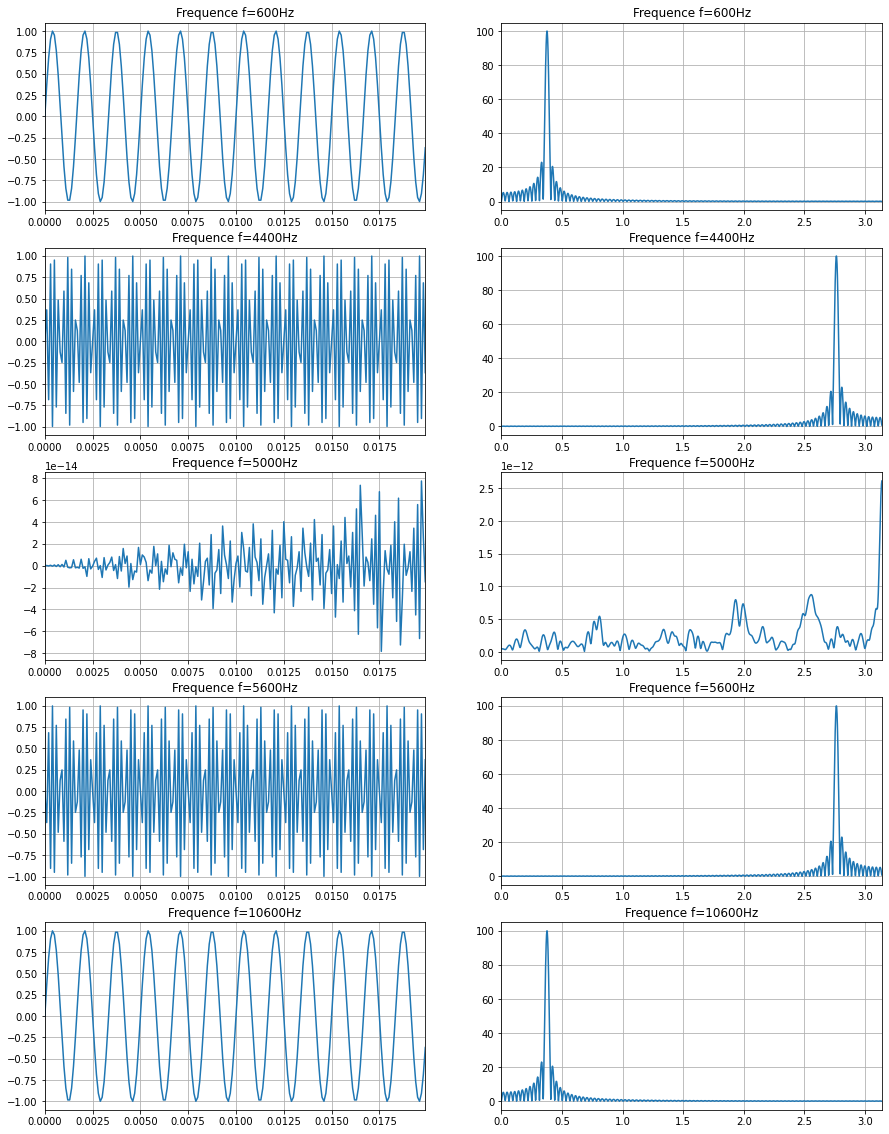

In [4]:
frequencies = [600, 4400, 5000, 5600, 10600]

plt.figure(figsize=(15, 20))

for n, freq in enumerate(frequencies):
    
    x, sinusoid = utils.get_sinusoid(1, freq, 10000, 200)
    phi, w = sgl.freqz(sinusoid, [1], worN=2048)
    
    plt.subplot(len(frequencies), 2, 2*n+1)
    plt.plot(x, sinusoid)
    plt.title(f"Frequence f={freq}Hz")
    plt.grid()
    plt.margins(x=0)
    
    plt.subplot(len(frequencies), 2, 2*n+2)
    plt.plot(phi, abs(w))
    plt.title(f"Frequence f={freq}Hz")
    plt.grid()
    plt.margins(x=0)

### Response :
For f=600Hz and f=4400Hz, we see that the Fourier transform corrrespond to the reality, because $2f \leq Fe$ (Shannon's theorem).  
For f=5000Hz, samples represents the sum of errors. We should see a graph with 0 everywhere if errors were equals to 0, because $2f = Fe$.  
For f=5600Hz and f=10600Hz, we observe a stroboscopic effect because $2f > Fe$. So the Fourier transform doesn't correspond to the reality.

## 1.3.3 Influence of the Parameter NTFD
### Q3)
For each of the following signals with N = 32 points and sampled at 10 kHz, you
are asked to predetermine what will be displayed by freqz. Specifically, you are
asked to:

* Predetermine the position of the lines of the Fourier transform;
* Examine whether or not the maximum octopus functions will be
achieved;
* Calculate the average number of frequency samples present per
secondary lobe.

Then check these predeterminations in Python.

1. A sinusoid of frequency 2650 Hz, NTFD = N (this is the general case: the frequency of the sinusoid is arbitrary withrespect to the sampling frequency)
2. A sinusoid of frequency 2650 Hz, NTFD = 256
3. A sinusoid of frequency 2500 Hz, NTFD = 32 (this is the particular case of a sinusoid of normalized frequency equal to an integer multiple of 1 /NTFD)
4. A sinusoid of frequency 2500 Hz, NTFD = 256

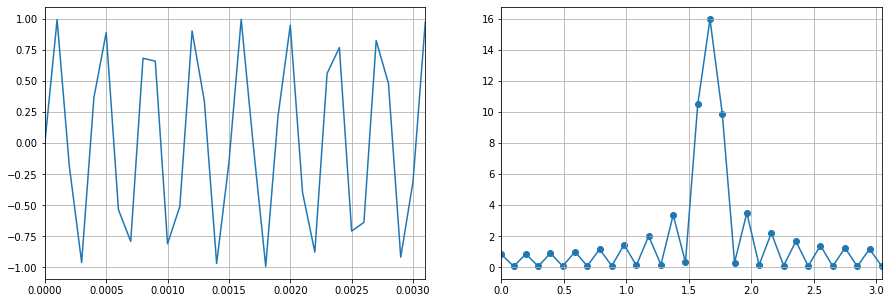

In [35]:
w, s = utils.get_sinusoid(1, 2650, 10000, 32)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(w, s)
plt.grid()
plt.margins(x=0)

plt.subplot(1,2,2)
w, s = sgl.freqz(s,1, worN=32)
plt.plot(w, abs(s))
plt.scatter(w, abs(s))
plt.grid()
plt.margins(x=0)


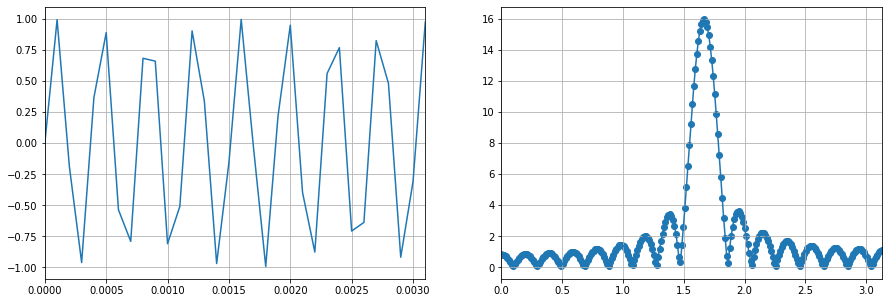

In [32]:
w, s = utils.get_sinusoid(1, 2650, 10000, 32)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(w, s)
plt.grid()
plt.margins(x=0)

plt.subplot(1,2,2)
w, s = sgl.freqz(s,1, worN=256)
plt.plot(w, abs(s))
plt.scatter(w, abs(s))
plt.grid()
plt.margins(x=0)

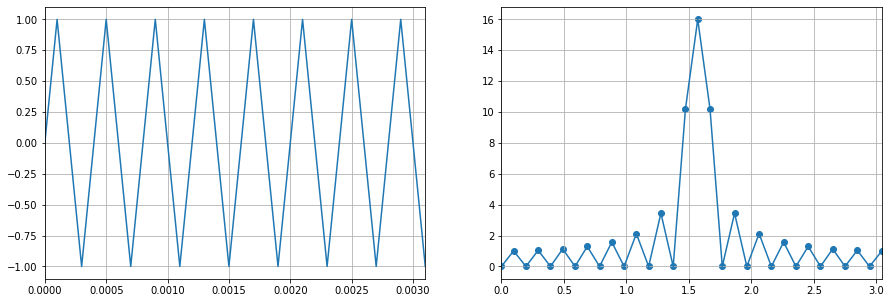

In [28]:
w, s = utils.get_sinusoid(1, 2500, 10000, 32)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(w, s)
plt.grid()
plt.margins(x=0)

plt.subplot(1,2,2)
w, s = sgl.freqz(s,1, worN=32)
plt.plot(w, abs(s))
plt.scatter(w, abs(s))
plt.grid()
plt.margins(x=0)

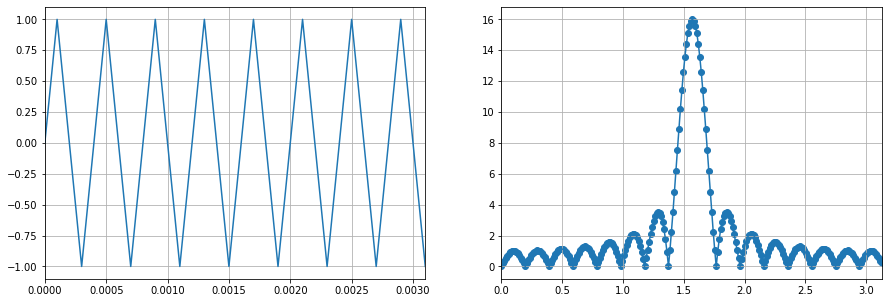

In [36]:
w, s = utils.get_sinusoid(1, 2500, 10000, 32)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(w, s)
plt.grid()
plt.margins(x=0)

plt.subplot(1,2,2)
w, s = sgl.freqz(s,1, worN=256)
plt.plot(w, abs(s))
plt.scatter(w, abs(s))
plt.grid()
plt.margins(x=0)

### Response
1. Function 1
    1. Position of the Fourier spike is at $2\pi*\frac{f}{F_e} = 1.66$
    2. the maximum of the Fourier spike is equal to $\frac{N}{2}=16$ (N=32)
    3. frequency sample = 2
1. Function 2
    1. Position of the Fourier spike is at $2\pi*\frac{f}{F_e} = 1.66$
    2. the maximum of the Fourier spike is equal to $\frac{N}{2}=16$ (N=32)
    3. frequency sample = 16
1. Function 3
    1. Position of the Fourier spike is at $2\pi*\frac{f}{F_e} = 1.57$
    2. the maximum of the Fourier spike is equal to $\frac{N}{2}=16$ (N=32)
    3. frequency sample = 2
1. Function 4
    1. Position of the Fourier spike is at $2\pi*\frac{f}{F_e} = 1.57$
    2. the maximum of the Fourier spike is equal to $\frac{N}{2}=16$ (N=32)
    3. frequency sample = 16

## 1.3.4 Spectral Analysis of Several Sine Waves
### Q4)
We consider a signal composed of a weighted sum of sinusoids

$ x(t)=\sum_{i=1}^3a_i\sin(2\pi f_it)$

$
\text{with}
\begin{cases}
f_1=158 \text{Hz, }a_1=1\\
f_2=312 \text{Hz, }a_2=1\\
f_3=401 \text{Hz, }a_3=1\\
\end{cases}
$

Predetermine, and then check, the values of fe, N, and NTFD to use to accurately
observe its spectrum, while keeping the computational load to a minimum.

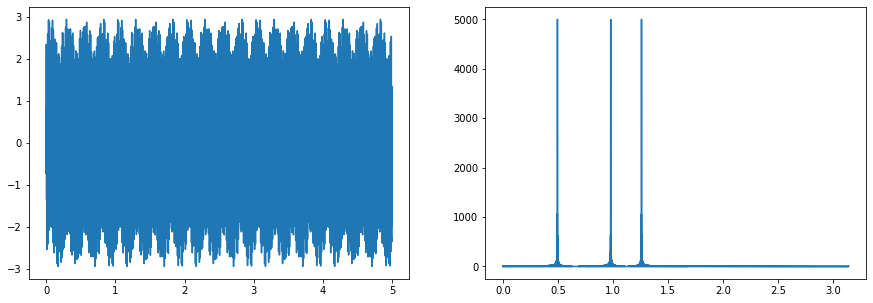

In [9]:
plt.figure(figsize=(15, 5))

N = 10000
NTFD = 10000
FE = 2000

t, s1 = utils.get_sinusoid(1, 158, FE, N)
t, s2 = utils.get_sinusoid(1, 312, FE, N)
t, s3 = utils.get_sinusoid(1, 401, FE, N)

s = s1 + s2 + s3

plt.subplot(1,2,1)
plt.plot(t,s)
plt.subplot(1,2,2)
w, s = sgl.freqz(s,worN=NTFD)
_ = plt.plot(w,abs(s))

## 1.4 Weighting Window Effect
### Q5)
In Python, our goal is to examine the spectral properties of the following
windows:
* rectangular window (provided by the rectwin function)
* Hamming window (provided by the hamming function)
* Blackman window (provided by the blackman function)  
It is asked to display their temporal pace and to check the difference D (in dB)
between the amplitude of the main lobe and those of the side lobes on their
spectra, and the half-width LP of the main lobe (in Hz) satisfy approximately the
following values:

|          | Squared | Hamming | Blackman |
|----------| ------- | ------- | -------- |
|     D    |    13dB |    40dB |     60dB |
| LP(en F) |     1/N |     2/N |       3/N| 

We consider $ fe=1\text{, } N=50\text{, } N_{TFD}=512$.

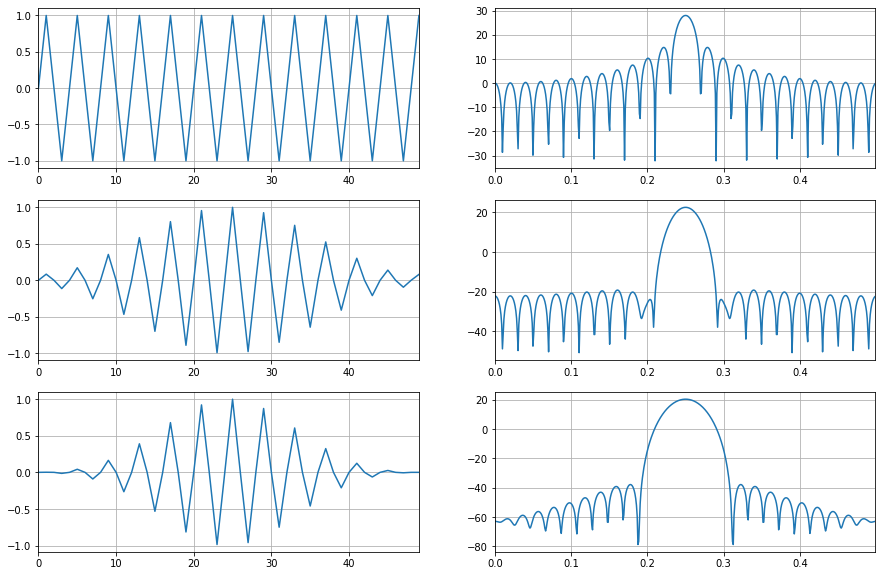

In [13]:
N = 50
Fe = 1
NTFD = 512
x, sin = utils.get_sinusoid(1, 0.25, Fe, N)
rectwin = np.ones(N)
hamming = sgl.windows.hamming(N)
blackman = sgl.windows.blackman(N)
plt.figure(figsize=(15,10))

plt.subplot(3,2,1)
plt.plot(x, sin*rectwin)
plt.grid()
plt.margins(x=0)

plt.subplot(3,2,2)
w, s = sgl.freqz(sin*rectwin, worN=NTFD)
plt.plot(w/(2*np.pi), utils.to_db(s))
plt.grid()
plt.margins(x=0)

plt.subplot(3,2,3)
plt.plot(x, sin*hamming)
plt.grid()
plt.margins(x=0)

plt.subplot(3,2,4)
w, s = sgl.freqz(sin*hamming, worN=NTFD)
plt.plot(w/(2*np.pi), utils.to_db(s))
plt.grid()
plt.margins(x=0)

plt.subplot(3,2,5)
plt.plot(x, sin*blackman)
plt.grid()
plt.margins(x=0)

plt.subplot(3,2,6)
w, s = sgl.freqz(sin*blackman, worN=NTFD)
plt.plot(w/(2*np.pi), utils.to_db(s))
plt.grid()
plt.margins(x=0)

### Q6)
Determine (on paper) and then check in Python, the window to use to be able to better distinguish the frequencies of a signal
$ f(t)=\sum_i a_i sin(2\pi f_i)t $
in the following cases:


a. $
\begin{cases}
f_1=1100 \text{Hz, }a_1=1\\
f_2=1200 \text{Hz, }a_2=1\\
\end{cases}
$

$ f_e = 8 \text{kHz, } N=N_{TFD}=256 $

b. $
\begin{cases}
f_1=510 \text{Hz, }a_1=500\\
f_2=1020 \text{Hz, }a_2=1\\
\end{cases}
$

$ f_e = 8 \text{kHz, } N=N_{TFD}=256 $

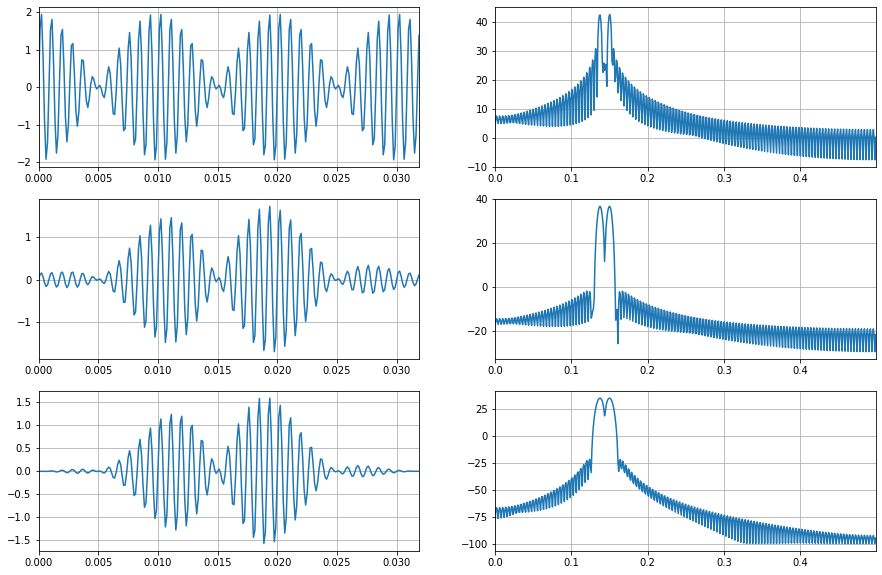

In [16]:
x, s1 = utils.get_sinusoid(1, 1100, 8000, 256)
x, s2 = utils.get_sinusoid(1, 1200, 8000, 256)
sin = s1 + s2

rectwin = np.ones(256)
hamming = sgl.windows.hamming(256)
blackman = sgl.windows.blackman(256)
plt.figure(figsize=(15,10))

plt.subplot(3,2,1)
plt.plot(x, sin*rectwin)
plt.grid()
plt.margins(x=0)

plt.subplot(3,2,2)
w, s = sgl.freqz(sin*rectwin, worN=NTFD)
plt.plot(w/(2*np.pi), utils.to_db(s))
plt.grid()
plt.margins(x=0)

plt.subplot(3,2,3)
plt.plot(x, sin*hamming)
plt.grid()
plt.margins(x=0)

plt.subplot(3,2,4)
w, s = sgl.freqz(sin*hamming, worN=NTFD)
plt.plot(w/(2*np.pi), utils.to_db(s))
plt.grid()
plt.margins(x=0)

plt.subplot(3,2,5)
plt.plot(x, sin*blackman)
plt.grid()
plt.margins(x=0)

plt.subplot(3,2,6)
w, s = sgl.freqz(sin*blackman, worN=NTFD)
plt.plot(w/(2*np.pi), utils.to_db(s))
plt.grid()
plt.margins(x=0)


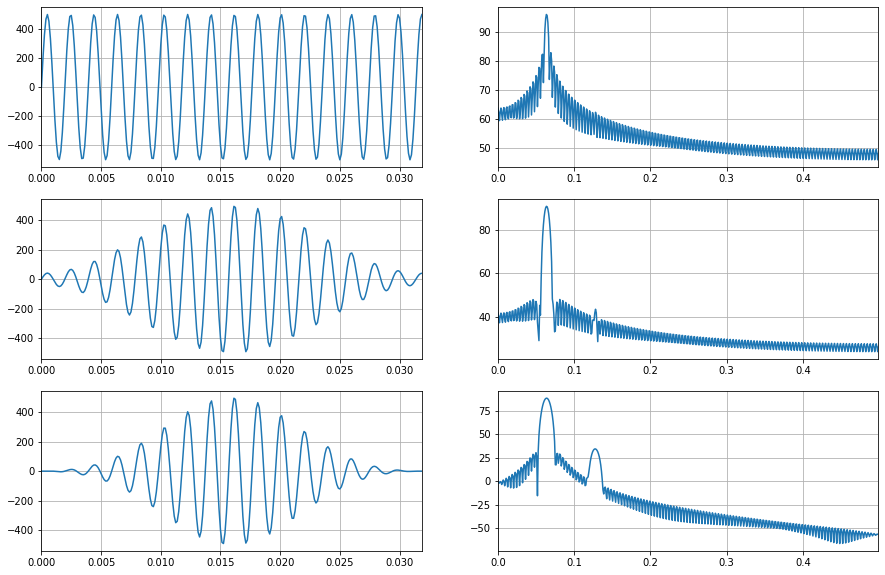

In [18]:
x, s1 = utils.get_sinusoid(500, 510, 8000, 256)
x, s2 = utils.get_sinusoid(1, 1020, 8000, 256)
sin = s1 + s2

rectwin = np.ones(256)
hamming = sgl.windows.hamming(256)
blackman = sgl.windows.blackman(256)
plt.figure(figsize=(15,10))

plt.subplot(3,2,1)
plt.plot(x, sin*rectwin)
plt.grid()
plt.margins(x=0)

plt.subplot(3,2,2)
w, s = sgl.freqz(sin*rectwin, worN=NTFD)
plt.plot(w/(2*np.pi), utils.to_db(s))
plt.grid()
plt.margins(x=0)

plt.subplot(3,2,3)
plt.plot(x, sin*hamming)
plt.grid()
plt.margins(x=0)

plt.subplot(3,2,4)
w, s = sgl.freqz(sin*hamming, worN=NTFD)
plt.plot(w/(2*np.pi), utils.to_db(s))
plt.grid()
plt.margins(x=0)

plt.subplot(3,2,5)
plt.plot(x, sin*blackman)
plt.grid()
plt.margins(x=0)

plt.subplot(3,2,6)
w, s = sgl.freqz(sin*blackman, worN=NTFD)
plt.plot(w/(2*np.pi), utils.to_db(s))
plt.grid()
plt.margins(x=0)